In [333]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [334]:
# read te data from .csv file
data = pd.read_csv('SVM_data.csv')
print('row of number:',len(data))
data.head()

# .the 'age' and 'thalach' will be used to run SVM
# .num: the answer. num > 0 (at risk)  vs. 1 ,  num = 0  (healthy)
# .thalach: heart rates during exercise

row of number: 303


,age,trestbps,chol,thalach,oldpeak,num
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,2
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [335]:
# if the value of 'num' >= 1, let it be 1. We only need the binary value

data['num'][data['num'] > 0 ] = 1

C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [336]:
# take the input X, and output y
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

# Note: X is all input (two columns in this case), y is the answer(0,1)
# DataFrame.iloc: Purely integer-location based indexing for selection by position.

# SVM Model and Plotting Function 

In [337]:
def SVM_Train_Plot(X_train, y_train, X_test, y_test, ga, Penalty):
    ''' Three part: 1. Train data  2.plotting training result  3. plotting test result'''
    
    ''' <<< 1.Training and Fitting data >>>'''
    # Fitting Kernel SVM to the Training set
    clf = SVC(kernel='rbf', gamma=ga, C=Penalty)
    clf.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = clf.predict(X_test)
    
    

    ''' <<< 2.Visualising the Training set results >>>'''
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train

    # Create a mesh of points to plot in
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
    #numpy.meshgrid: Return coordinate matrices from coordinate vectors (generate grid).
    

    # Use the grid to plot the decision boundaries for a classifier.
    plt.figure(figsize=(6,8))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#008800','#DDDDDD')))

    # Setting the range of x,y axis
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # plotting the scatter with different label color
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#99FF99', 'k'))(i), label = j)
    # plotting
    plt.title('Kernel SVM (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Maximum Exercise Heart Rate')
    plt.legend()
    plt.show()
    

    
    
    ''' <<< 3.Visualising the Test set results >>>'''
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
    plt.figure(figsize=(6,8))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#008800','#DDDDDD')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#99FF99', 'k'))(i), label = j)
    plt.title('Kernel SVM (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    return y_pred

In [338]:
'''
Important Parameters:
1.kernel: string, optional (default='rbf')， 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.
          'rbf' (radial based function) is common usage.
        
2.gamma: float, optional (default='auto', If gamma is 'auto' then 1/n_features will be used instead.)   
         Larger gamma can accept more error. it mean fitting data is easier.         
        
3.C: Penalty parameter C of the error term. 
     Larger C let mistake cause more cost in the optimal function.

Attributes:
clf.support_ :  array-like: Indices of support vectors.
clf.support_vectors_ : array-like; Support vectors.
clf.n_support_ : array-like; Number of support vectors for each class.
clf.dual_coef_ : array; oefficients of the support vector in the decision function
clf.coef_ : array; Weights assigned to the features (coefficients in the primal problem). 
                   This is only available in the case of a linear kernel.
clf.intercept_ : array; Constants in decision function.
'''

"\nImportant Parameters:\n1.kernel: string, optional (default='rbf')， 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.\n          'rbf' (radial based function) is common usage.\n        \n2.gamma: float, optional (default='auto', If gamma is 'auto' then 1/n_features will be used instead.)   \n         Larger gamma can accept more error. it mean fitting data is easier.         \n        \n3.C: Penalty parameter C of the error term. \n     Larger C let mistake cause more cost in the optimal function.\n\nAttributes:\nclf.support_ :  array-like: Indices of support vectors.\nclf.support_vectors_ : array-like; Support vectors.\nclf.n_support_ : array-like; Number of support vectors for each class.\nclf.dual_coef_ : array; oefficients of the support vector in the decision function\nclf.coef_ : array; Weights assigned to the features (coefficients in the primal problem). \n                   This is only available in the case of a linear kernel.\nclf.intercept_ : array; Constan

# SVM  Cas1. Without test data (to fit the book figure) 

In [339]:
X_train=X
X_test=X
y_train=y
y_test =y

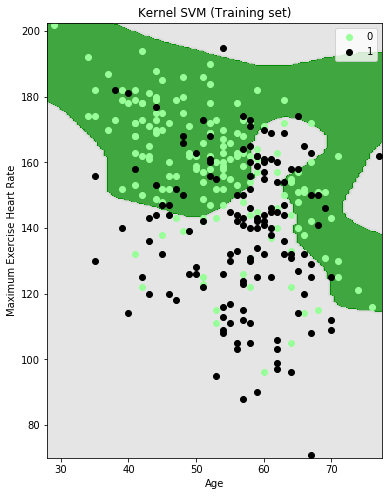

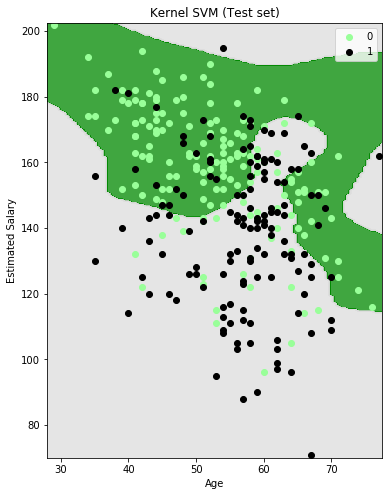

In [340]:
y_pred = SVM_Train_Plot(X_train, y_train, X_test, y_test, 0.0035, 300)

In [341]:
# Making the Confusion Matrix (矩陣對角元素為正確預測數量)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
Accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print('Confusion Matrix \n',cm)
print('Accuracy', Accuracy)

Confusion Matrix 
 [[128  36]
 [ 34 105]]
Accuracy 0.76897689769


# SVM  Cas2. Set test data

In [342]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
# test_size value is the proportion of test data

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('train data length: {},  test data length: {}'.format(X_train2.shape[0], X_test2.shape[0] )) 

train data length: 242,  test data length: 61


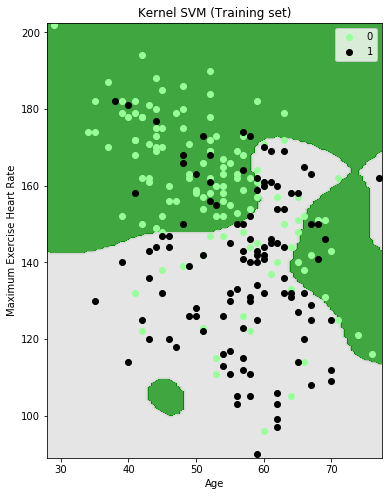

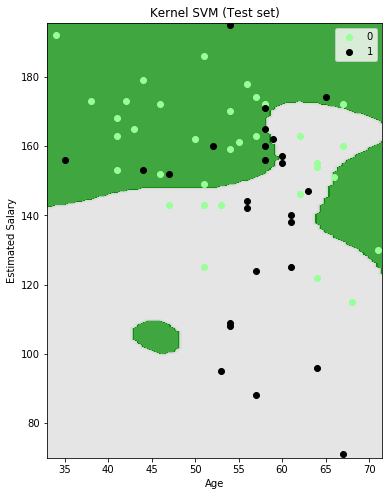

In [343]:
y_pred2 = SVM_Train_Plot(X_train2, y_train2, X_test2, y_test2, 0.0035, 300)

In [344]:
# Making the Confusion Matrix (矩陣對角元素為正確預測數量)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred2)
Accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print('Confusion Matrix \n',cm)
print('Accuracy', Accuracy)

Confusion Matrix 
 [[24 11]
 [10 16]]
Accuracy 0.655737704918


# SVM  Cas3. Large gama and low C(Over fitting)

In [345]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
# test_size value is the proportion of test data

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('train data length: {},  test data length: {}'.format(X_train3.shape[0], X_test3.shape[0] ))

train data length: 242,  test data length: 61


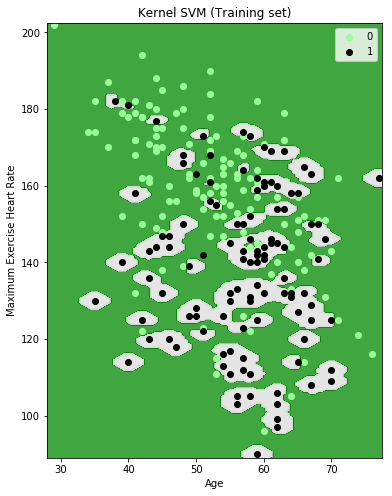

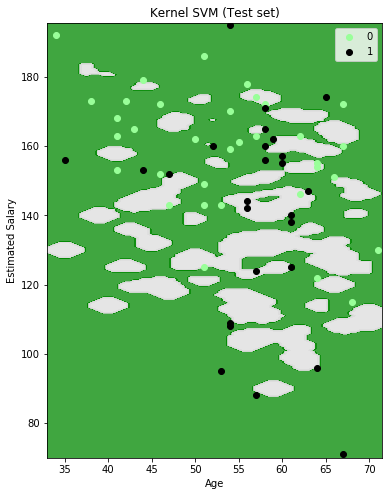

In [346]:
y_pred3 = SVM_Train_Plot(X_train3, y_train3, X_test3, y_test3, 0.5, 1)

In [347]:
# Making the Confusion Matrix (矩陣對角元素為正確預測數量)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3, y_pred3)
Accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print('Confusion Matrix \n',cm)
print('Accuracy', Accuracy)

Confusion Matrix 
 [[28  7]
 [22  4]]
Accuracy 0.524590163934


# SVM  Cas4. small gama and larger C (Under fitting)

In [348]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
# test_size value is the proportion of test data

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('train data length: {},  test data length: {}'.format(X_train4.shape[0], X_test4.shape[0] ))

train data length: 242,  test data length: 61


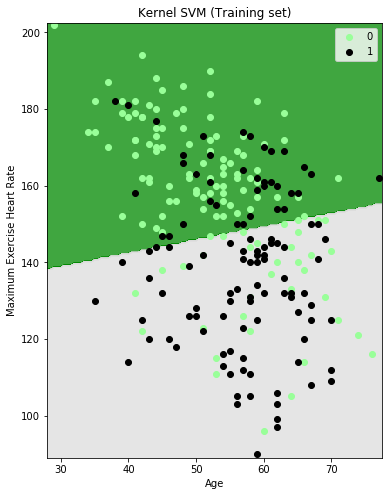

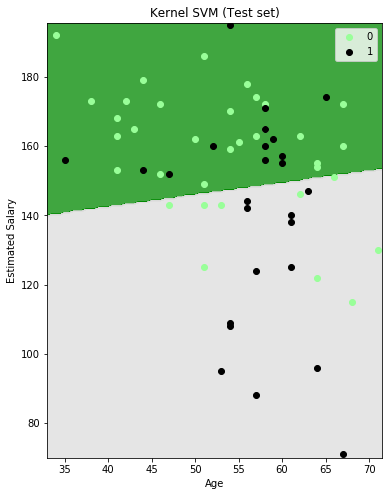

In [349]:
y_pred4 = SVM_Train_Plot(X_train4, y_train4, X_test4, y_test4, 1e-6, 10000)

In [350]:
# Making the Confusion Matrix (矩陣對角元素為正確預測數量)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4, y_pred4)
Accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print('Confusion Matrix \n',cm)
print('Accuracy', Accuracy)

Confusion Matrix 
 [[26  9]
 [13 13]]
Accuracy 0.639344262295
